In [1]:
%tensorflow_version 2.1

UsageError: Line magic function `%tensorflow_version` not found.


In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [18]:
# Print versions
!python --versions
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

Numpy 1.26.4
TensorFlow 2.15.0


unknown option --versions
usage: C:\Users\Caiti Minahan\AppData\Local\Programs\Python\Python39\python.exe [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.


AttributeError: module 'tensorflow.keras' has no attribute '__version__'

In [20]:
# Settings
nsamples = 1000     # Number of samples to use as a dataset
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.2    # Percentage of samples that should be held for test set
tflite_model_name = 'sine_model'  # Will be given .tflite suffix
c_model_name = 'sine_model'       # Will be given .h suffix

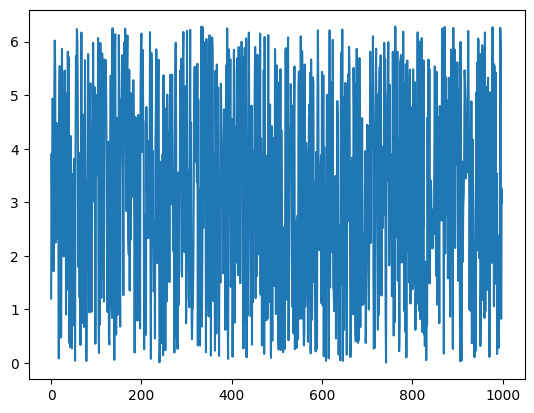

In [21]:
# Generate some random samples
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

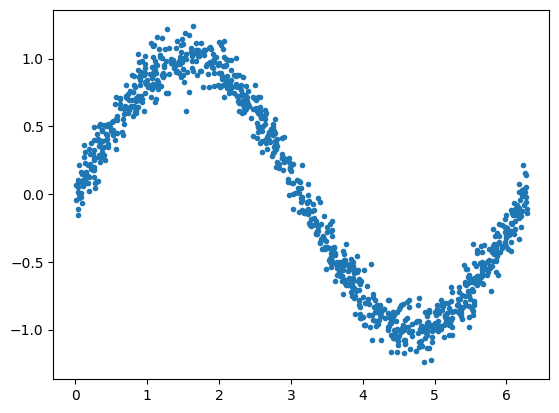

In [22]:
# Create a noisy sinewave with these values
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

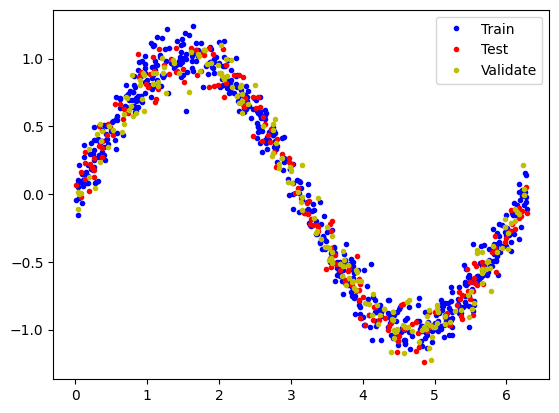

In [23]:
# Plit the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == nsamples

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [25]:
# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

In [26]:
# View model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [28]:
# Train model
history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/500


6/6 [==============================] - 4s 112ms/step - loss: 0.6145 - mae: 0.6145 - val_loss: 0.5330 - val_mae: 0.5330
Epoch 2/500
6/6 [==============================] - 0s 23ms/step - loss: 0.5473 - mae: 0.5473 - val_loss: 0.5145 - val_mae: 0.5145
Epoch 3/500
6/6 [==============================] - 0s 36ms/step - loss: 0.5310 - mae: 0.5310 - val_loss: 0.5009 - val_mae: 0.5009
Epoch 4/500
6/6 [==============================] - 0s 27ms/step - loss: 0.5160 - mae: 0.5160 - val_loss: 0.4884 - val_mae: 0.4884
Epoch 5/500
6/6 [==============================] - 0s 26ms/step - loss: 0.5031 - mae: 0.5031 - val_loss: 0.4808 - val_mae: 0.4808
Epoch 6/500
6/6 [==============================] - 0s 19ms/step - loss: 0.4940 - mae: 0.4940 - val_loss: 0.4676 - val_mae: 0.4676
Epoch 7/500
6/6 [==============================] - 0s 19ms/step - loss: 0.4810 - mae: 0.4810 - val_loss: 0.4570 - val_mae: 0.4570
Epoch 8/500
6/6 [==============================] - 0s 23ms/step - loss: 0.4717 - mae: 0

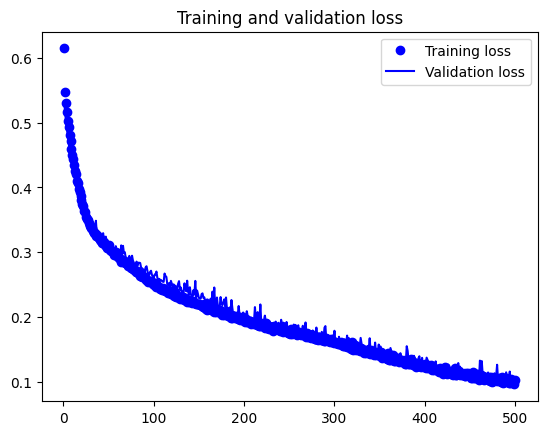

In [29]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 4ms/step


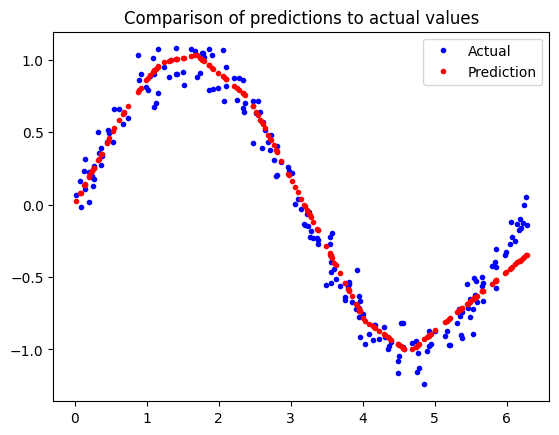

In [30]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

In [31]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\CAITIM~1\AppData\Local\Temp\tmpzqch5b8g\assets


INFO:tensorflow:Assets written to: C:\Users\CAITIM~1\AppData\Local\Temp\tmpzqch5b8g\assets


3168